### Ideias
- Adicionar probabilidade de alta variação, além dos limites tradicionais
- Integração entre variáveis claramente correlacionadas
- H2 e Metano inversamente proporcionais de modo que a soma de seus valores apresente uma variação de 75-105% (tipicamente 93-98%) do total

- ✅ H2
- ✅ Metano
- ✅ Etileno
- ✅ Etano
- ✅ Propileno
- ✅ Propano
- ✅ N-Butano
- ✅ C5+
- ✅ CO
- ✅ CO2
- ✅ Enxofre

Node H2: Metano, Enxofre, Etileno, N-Butano, Propileno, CO, Vazão, 
Node Metano: Etano, Propano, C5+, CO2, 
Node Enxofre: 
Node Etileno: 
Node N-Butano: 
Node Etano: 
Node Propano: 
Node C5+: 
Node CO2: 
Node Propileno: 
Node CO: 
Node Vazão: 


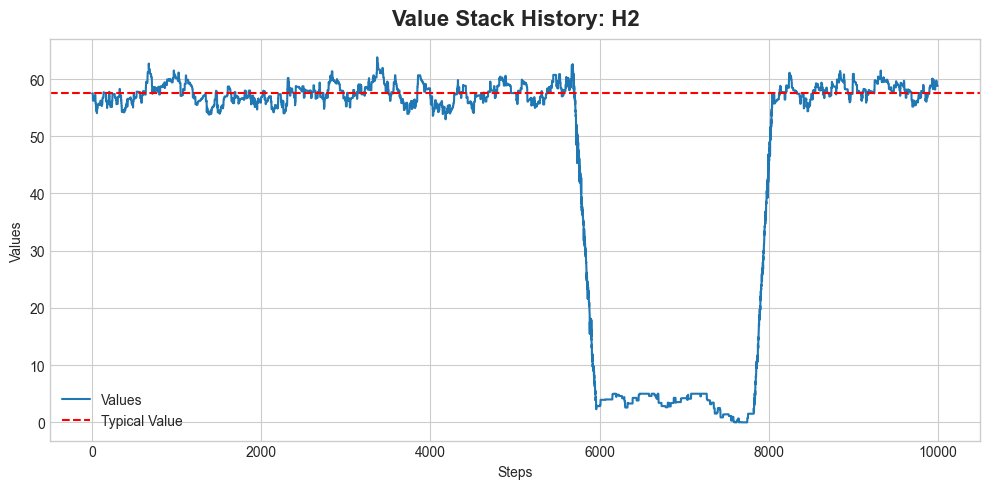

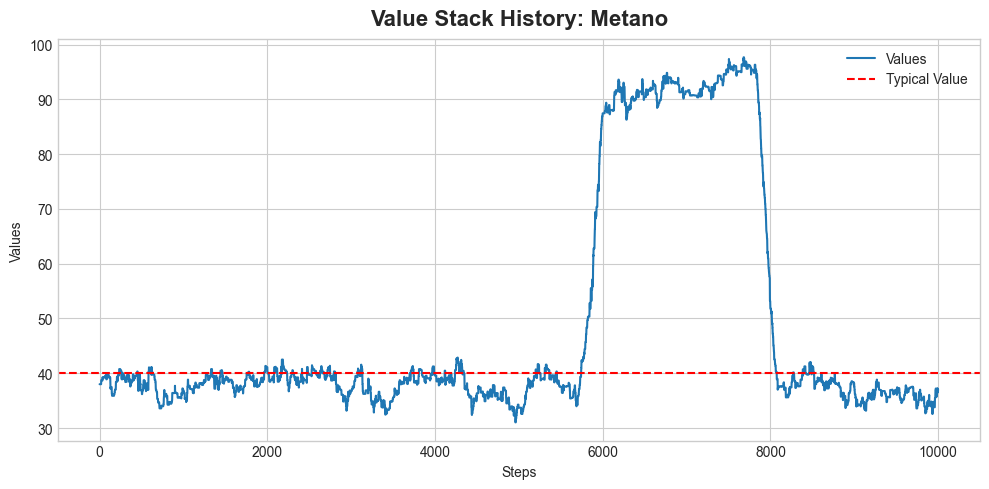

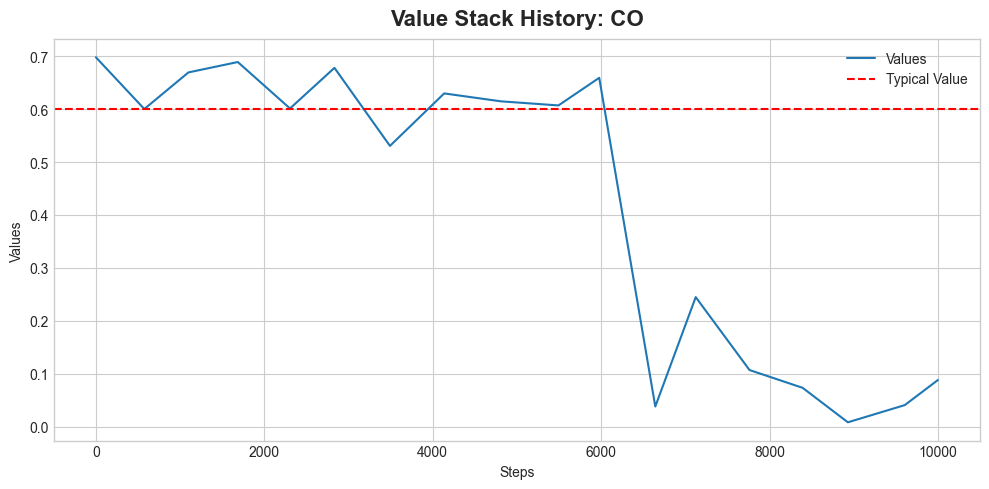

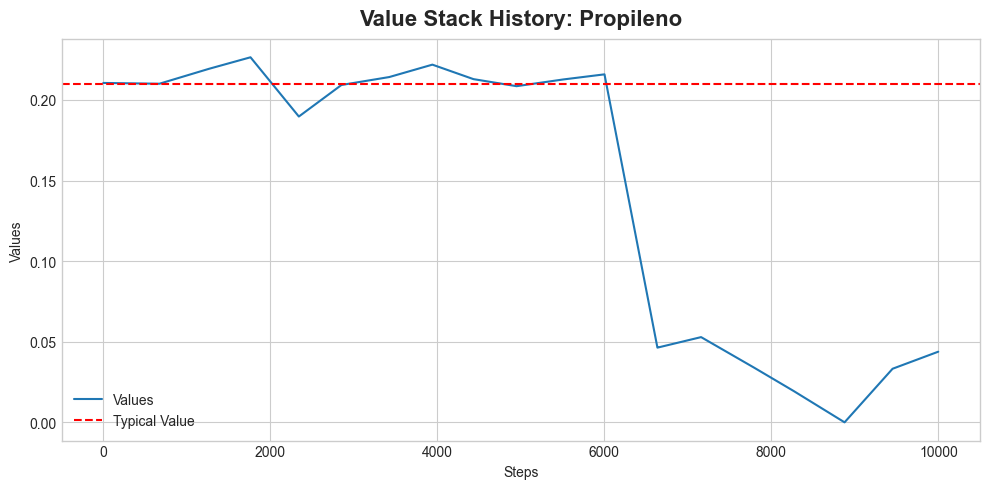

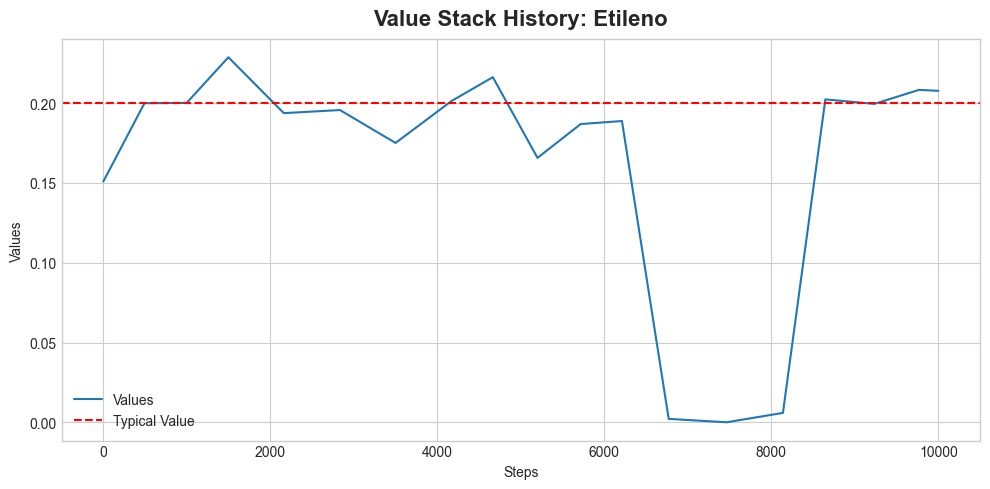

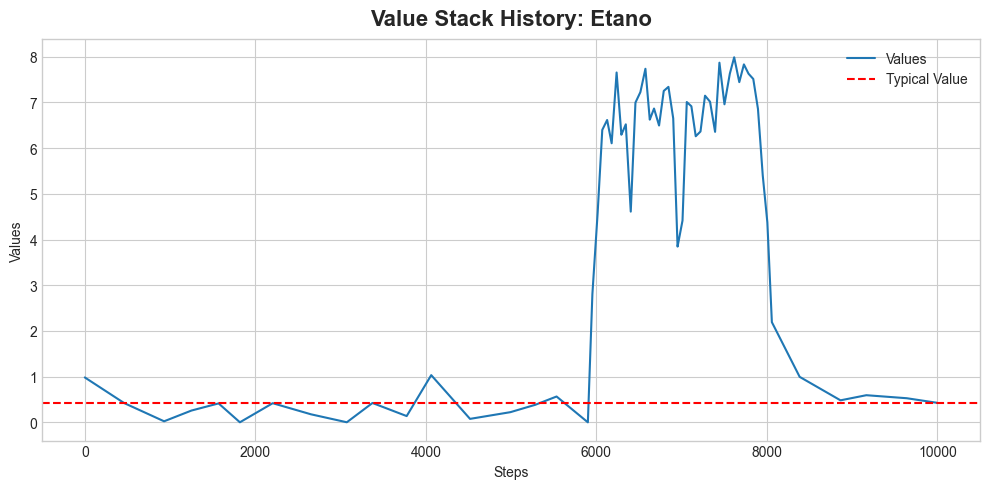

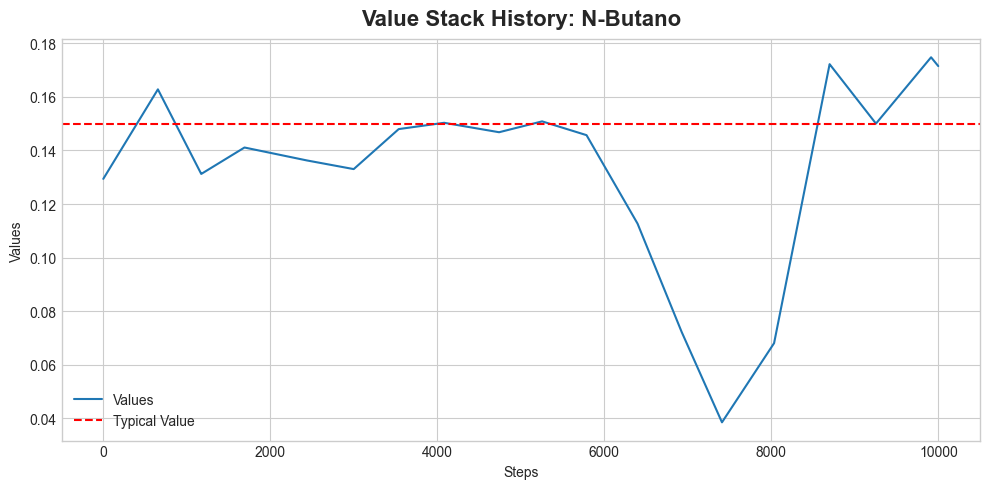

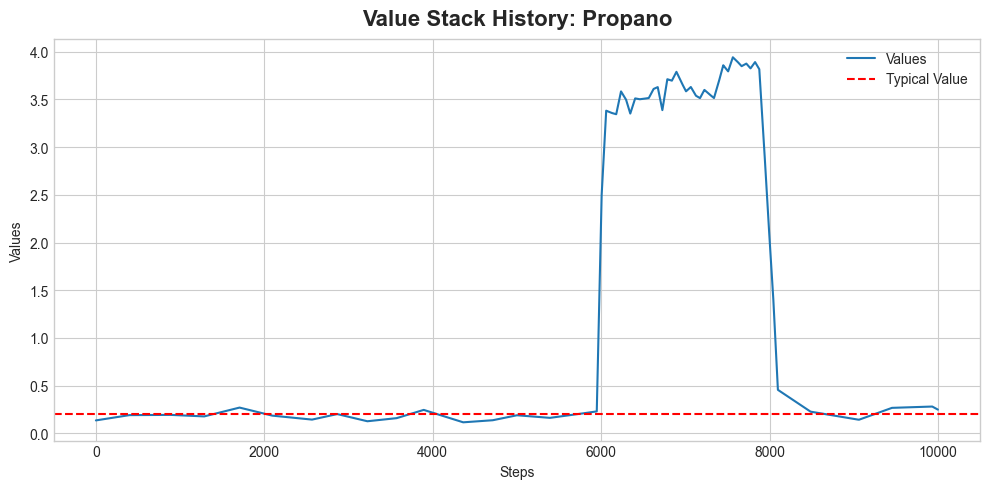

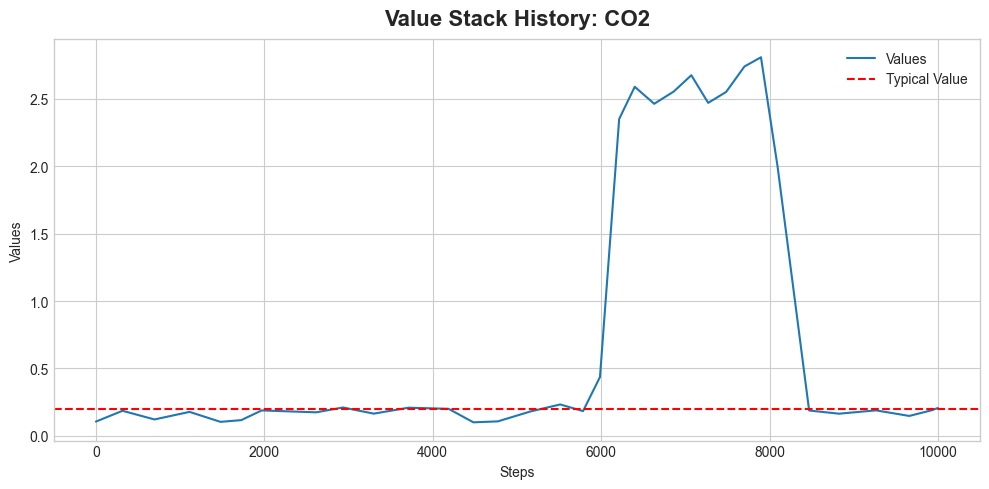

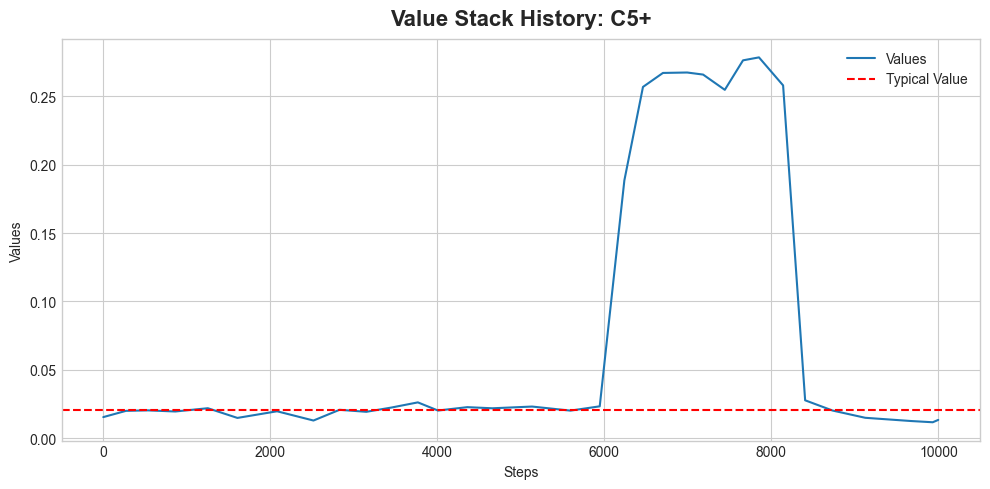

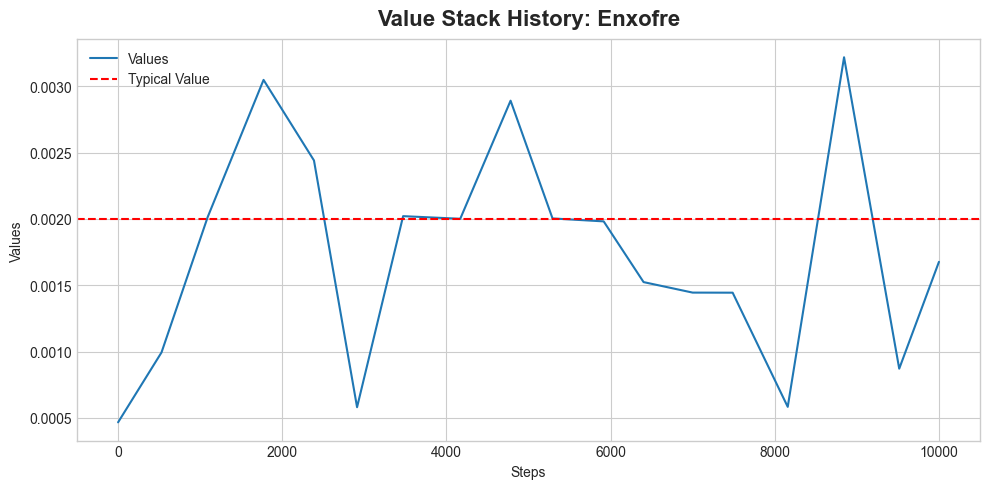

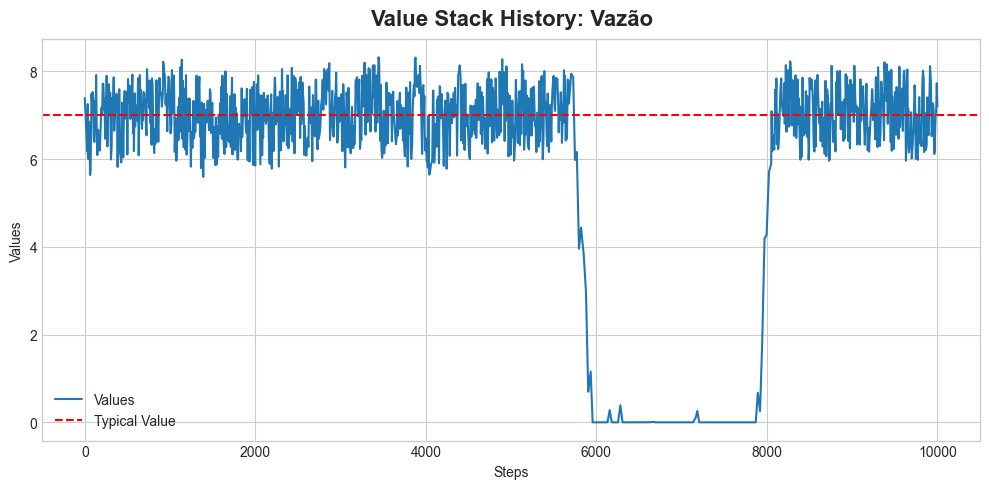

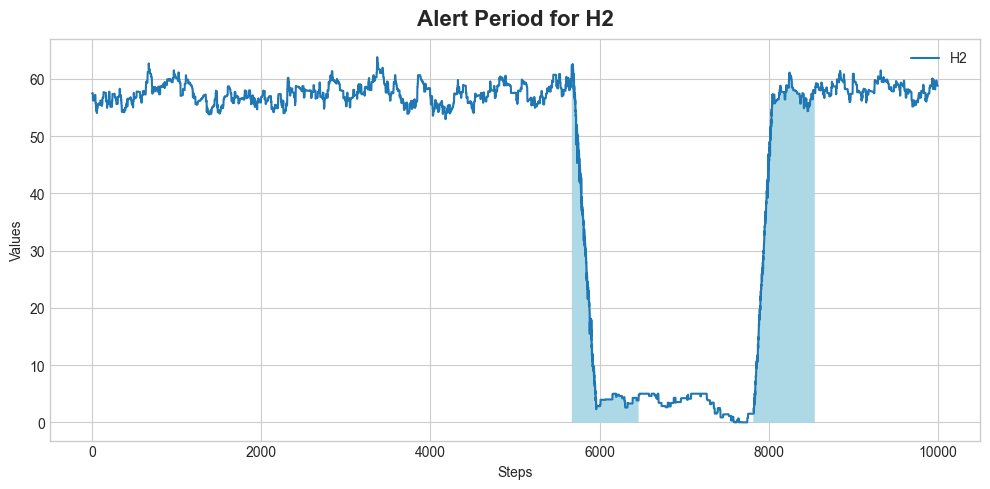

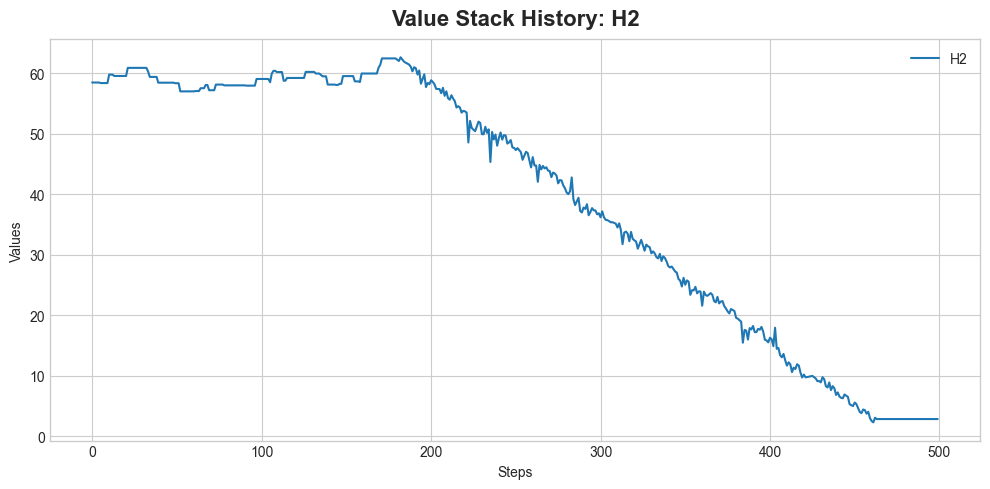

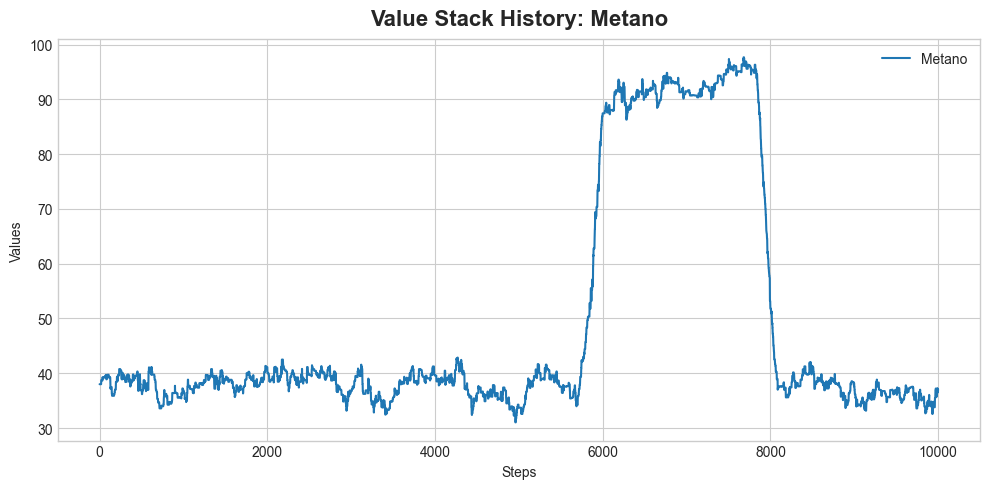

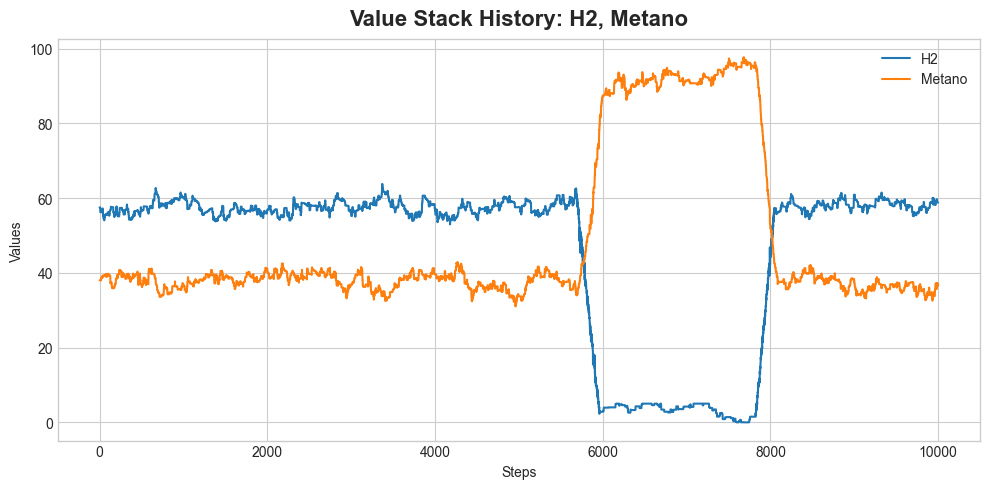

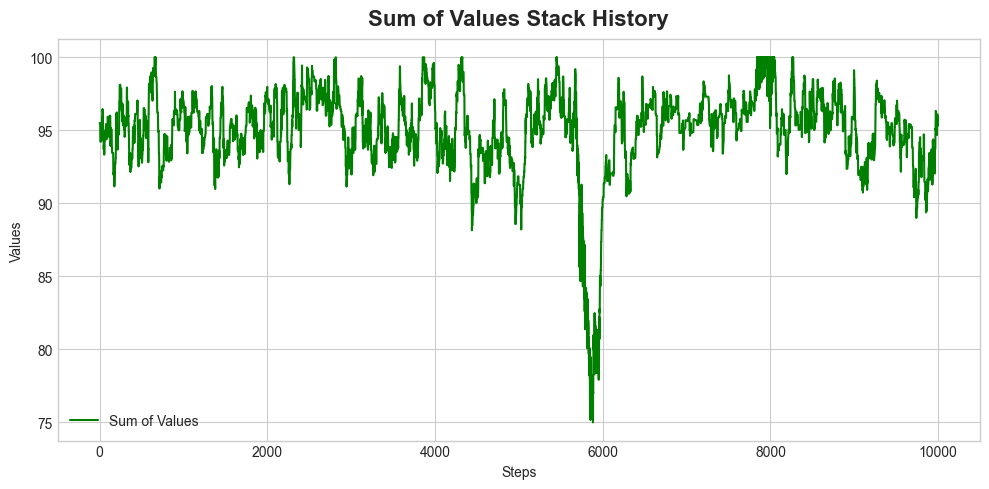

In [1]:
from simulator_modules.Operators import HighVariability, LowVariability
from simulator_modules.Relations import LinkH2Metano, LinkSimilarBehavior, LinkLongReturn
from simulator_modules.TurbineSimulator import Graph, plot_nodes_history, plot_sum_history


def create_nodes_and_relations(prob=0.0001):
    # Create nodes
    H2 = HighVariability(lower_bound=30, upper_bound=70, typical_value=57.5, name="H2",
                         typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1,
                         exceed_prob=prob, exceed_duration_range=(180, 300),
                         return_duration_range=(180, 300), exceed_bias_range=(-5, 5),
                         exceed_bias_prob=0.05, exceed_peak_value_range=(0, 5),
                         hold_duration_range=(1500, 2000), hold_prob_vary=0.05, hold_variation=1)
    Metano = HighVariability(lower_bound=30, upper_bound=70, typical_value=40, name="Metano",
                             typical_bias=0.1, typical_bias_prob=0.1, theta=1.5, theta_prob=0.1)
    Enxofre = LowVariability(lower_bound=0, upper_bound=8, typical_value=0.002, name="Enxofre",
                             theta=0.002, steps_range=(480, 700))
    Etileno = LowVariability(lower_bound=0.05, upper_bound=0.55, typical_value=0.2, name="Etileno",
                             theta=0.05, steps_range=(480, 700))
    NButano = LowVariability(lower_bound=0.01, upper_bound=0.45, typical_value=0.15, name="N-Butano",
                             theta=0.03, steps_range=(480, 700))
    Etano = LowVariability(lower_bound=0.06, upper_bound=1.8, typical_value=0.43, name="Etano",
                           theta=0.7, steps_range=(240, 480))
    Propano = LowVariability(lower_bound=0, upper_bound=0.69, typical_value=0.2, name="Propano",
                             theta=0.1, steps_range=(240, 480))
    C5 = LowVariability(lower_bound=0, upper_bound=0.3, typical_value=0.021, name="C5+",
                        theta=0.01, steps_range=(240, 480))
    CO2 = LowVariability(lower_bound=0, upper_bound=0.3, typical_value=0.2, name="CO2",
                         theta=0.1, steps_range=(240, 480))
    Propileno = LowVariability(lower_bound=0.06, upper_bound=0.3, typical_value=0.21, name="Propileno",
                               theta=0.02, steps_range=(480, 700))
    CO = LowVariability(lower_bound=0, upper_bound=0.8, typical_value=0.6, name="CO",
                        theta=0.1, steps_range=(480, 700))
    vazao = LowVariability(lower_bound=3, upper_bound=10, typical_value=7, name="Vazão",
                           theta=1, steps_range=(5, 10))

    # Create relations
    relations = {
        "relation1": LinkH2Metano(limit_lower_bound=75, limit_upper_bound=100,
                                  typical_lower_bound=93, typical_upper_bound=98),
        "relation2": LinkSimilarBehavior(correlation=0.3, typical_bias_prob=0.1,
                                         typical_bias=0.6, theta_prob=0.5),
        "relation3": LinkSimilarBehavior(correlation=0.6, typical_bias_prob=0.1,
                                         typical_bias=0.01, theta_prob=0.5, amplifier=1.8),
        "relation4": LinkSimilarBehavior(correlation=0.7, typical_bias_prob=0.4,
                                         typical_bias=0.4, theta_prob=0.5),
        "relation5": LinkSimilarBehavior(correlation=0.85, typical_bias_prob=0.1,
                                         typical_bias=0.4, theta_prob=0.7, amplifier=14,
                                         holding_range=(50, 60)),
        "relation6": LinkSimilarBehavior(correlation=0.94, typical_bias_prob=0.01,
                                         typical_bias=0.8, theta_prob=0.7, amplifier=14,
                                         holding_range=(50, 60)),
        "relation7": LinkSimilarBehavior(correlation=0.89, typical_bias=0.01,
                                         typical_bias_prob=0.1, theta_prob=0.7, amplifier=10,
                                         holding_range=(180, 300)),
        "relation8": LinkSimilarBehavior(correlation=0.92, typical_bias=0.1,
                                         typical_bias_prob=0.1, theta_prob=0.7, amplifier=10,
                                         holding_range=(180, 230)),
        "relation9": LinkLongReturn(correlation=0.5, typical_bias_prob=0.1,
                                    typical_bias=0.1, theta_prob=0.5, amplifier=1.8,
                                    holding_range=(480, 700), back_range=(6000, 7200),
                                    back_typical_prob=0.7, back_typical_range=(-0.02, 0.02)),
        "relation10": LinkLongReturn(correlation=0.5, typical_bias_prob=0.1,
                                     typical_bias=0.1, theta_prob=0.5, amplifier=1.8,
                                     holding_range=(480, 700), back_range=(6000, 7200),
                                     back_typical_prob=0.7, back_typical_range=(-0.02, 0.02)),
        "relation11": LinkSimilarBehavior(correlation=0.92, typical_bias=0.1,
                                          typical_bias_prob=0.5, theta_prob=1, amplifier=1.4,
                                          holding_range=(20, 30))
    }

    return H2, Metano, Enxofre, Etileno, NButano, Etano, Propano, C5, CO2, Propileno, CO, vazao, relations


def create_graph():
    H2, Metano, Enxofre, Etileno, NButano, Etano, Propano, C5, CO2, Propileno, CO, vazao, relations = create_nodes_and_relations()

    graph = Graph(random_seed=44, debug=True, n_unstable_steps=480)
    node1 = graph.add_node(H2)
    node2 = graph.add_node(Metano)
    graph.add_edge(root=node1, child=node2, strategy=relations["relation1"])
    node3 = graph.add_node(Enxofre)
    graph.add_edge(root=node1, child=node3, strategy=relations["relation2"])
    node4 = graph.add_node(Etileno)
    graph.add_edge(root=node1, child=node4, strategy=relations["relation3"])
    node5 = graph.add_node(NButano)
    graph.add_edge(root=node1, child=node5, strategy=relations["relation4"])
    node6 = graph.add_node(Etano)
    graph.add_edge(root=node2, child=node6, strategy=relations["relation5"])
    node7 = graph.add_node(Propano)
    graph.add_edge(root=node2, child=node7, strategy=relations["relation6"])
    node8 = graph.add_node(C5)
    graph.add_edge(root=node2, child=node8, strategy=relations["relation7"])
    node9 = graph.add_node(CO2)
    graph.add_edge(root=node2, child=node9, strategy=relations["relation8"])
    node10 = graph.add_node(Propileno)
    graph.add_edge(root=node1, child=node10, strategy=relations["relation9"])
    node11 = graph.add_node(CO)
    graph.add_edge(root=node1, child=node11, strategy=relations["relation10"])
    node12 = graph.add_node(vazao)
    graph.add_edge(root=node1, child=node12, strategy=relations["relation11"])

    return graph, [node1, node2, node3, node4, node5, node6, node7, node8, node9, node10, node11, node12]


graph, nodes = create_graph()
node1, node2, node3, node4, node5, node6, node7, node8, node9, node10, node11, node12 = nodes

graph.display()
# graph.simulate(10000)
for _ in range(10000):
    graph.simulate(1)
# graph.simulate(6000)
# graph.simulate(4000)

# graph.simulate(6000)
node1.plot_history()
node2.plot_history()
node11.plot_history()
node10.plot_history()
node4.plot_history()
node6.plot_history()
node5.plot_history()
node7.plot_history()
node9.plot_history()
node8.plot_history()
node3.plot_history()
node12.plot_history()

graph.plot_alert_period(node=node1)

plot_nodes_history(nodes=[node1], range=(5500,6000))
plot_nodes_history(nodes=[node2])
plot_nodes_history(nodes=[node1,node2])
# plot_nodes_history(nodes=[node10])
# plot_nodes_history(nodes=[node11])
plot_sum_history(node1, node2)

# Test non-debug mode

In [6]:
import matplotlib.pyplot as plt

def plot_history(node, stack, size: tuple = (10, 5)) -> None:
    plt.figure(figsize=size)
    plt.plot(stack, label="Values")
    plt.axhline(node.op.typical_value, color="r", linestyle="--", label="Typical Value")
    plt.title(f"Value Stack History: {node.name}")
    plt.xlabel("Steps")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

def plot_alert_period(stack, stack2, node) -> None:
    plt.figure(figsize=(10, 5))
    plt.plot(stack2, label=node.name)

    x = list(range(len(stack)))
    for i in range(len(stack)):
        if stack[i]:
            plt.fill_between([x[i], x[i]], 0, stack2[i], color='lightblue', alpha=0.5)
    
    plt.title(f"Alert Period for {node.name}")
    plt.xlabel("Steps")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

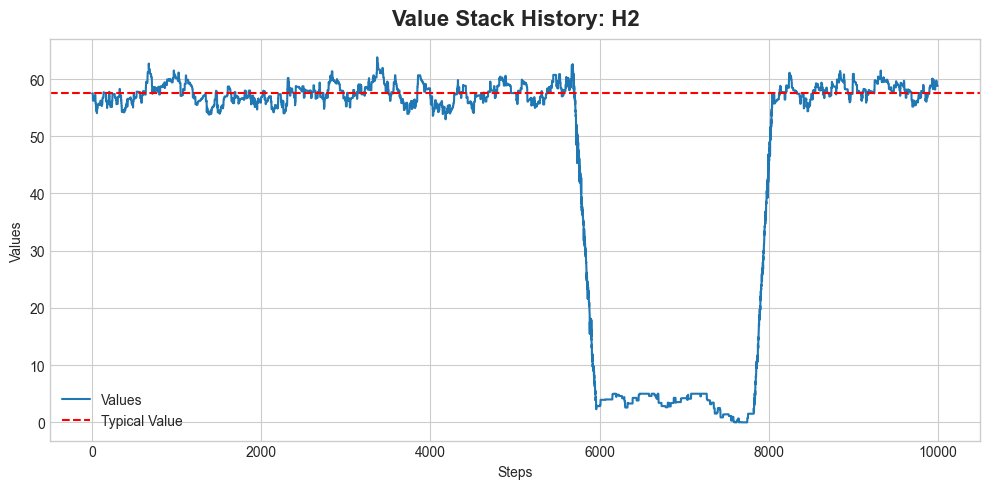

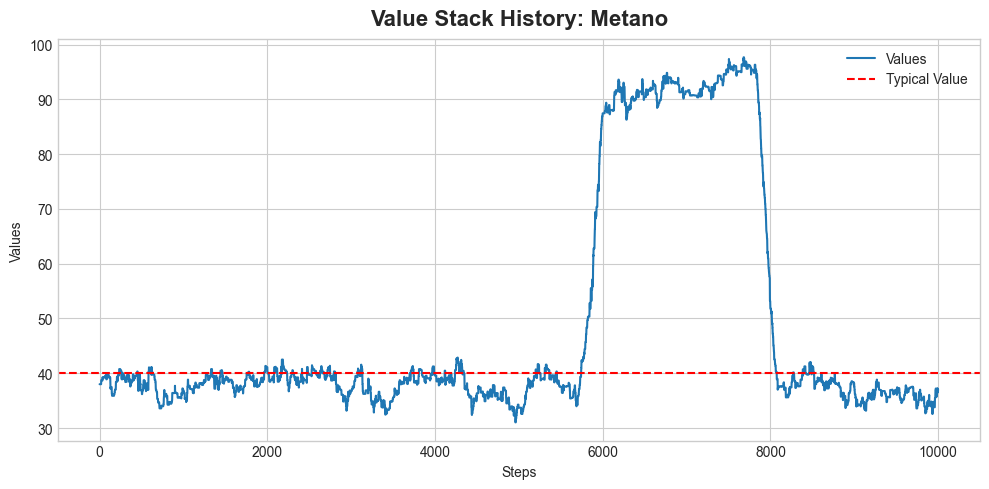

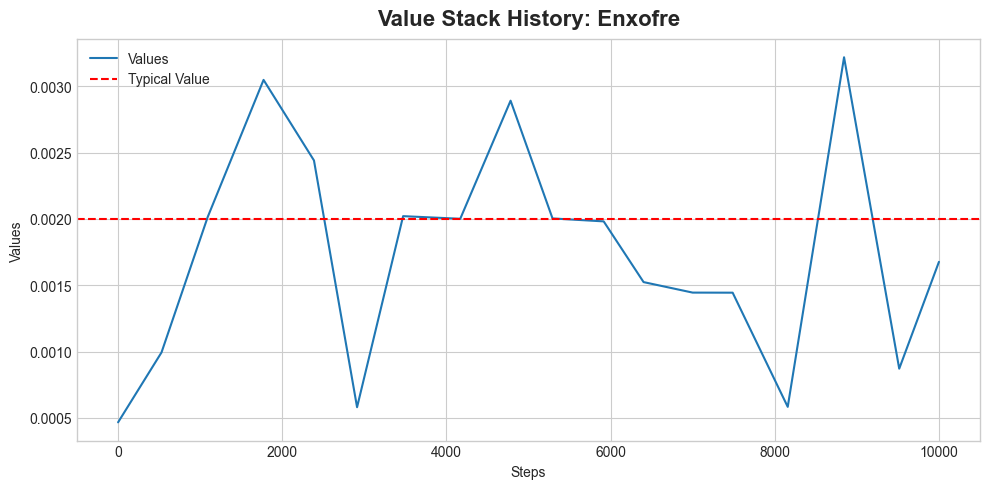

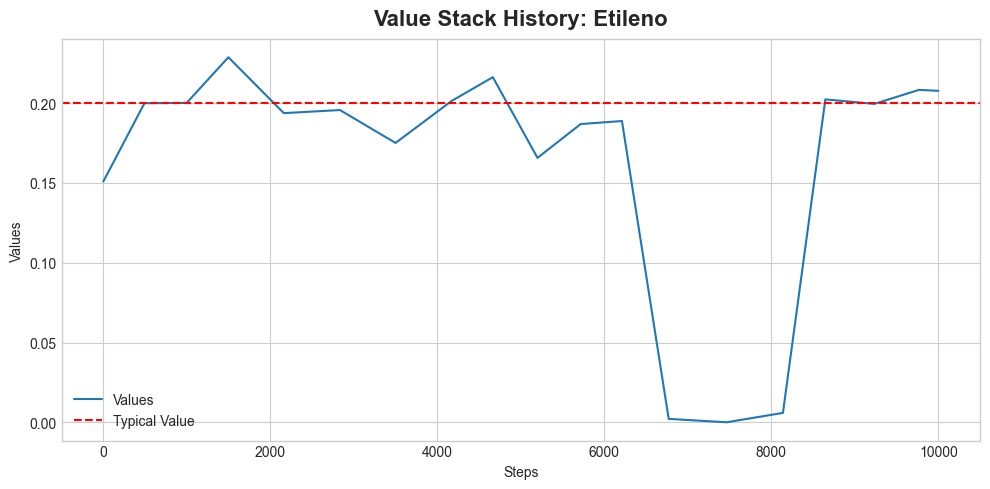

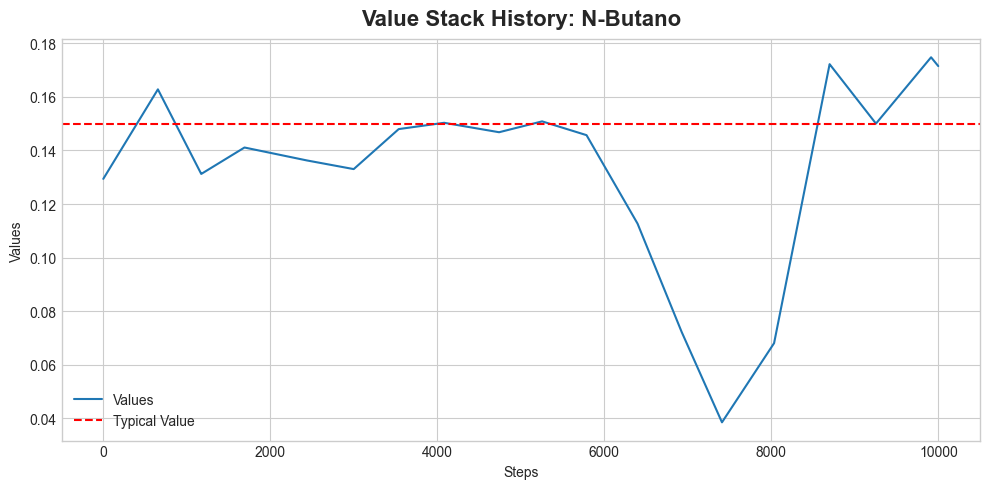

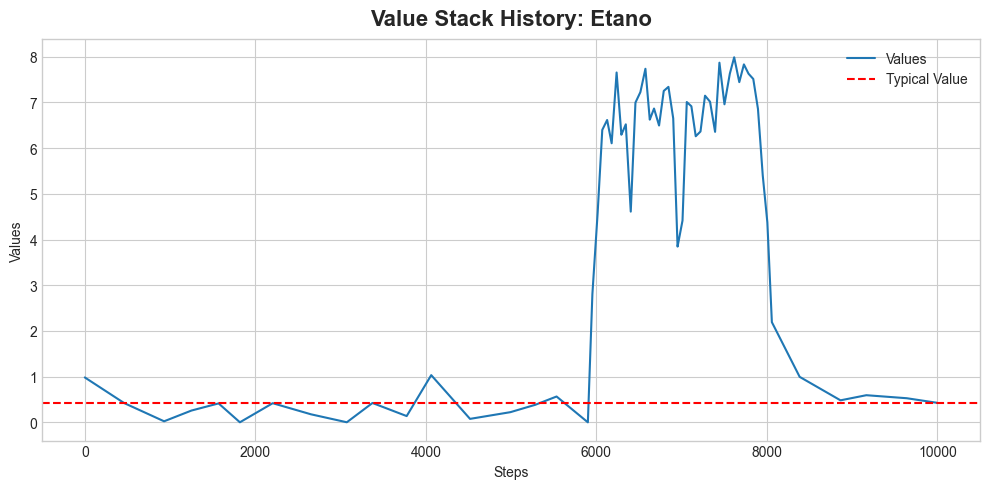

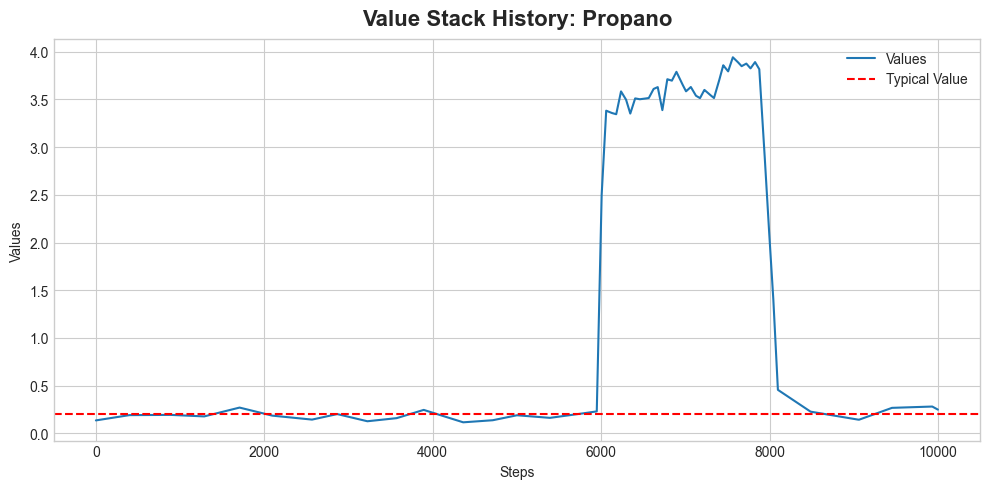

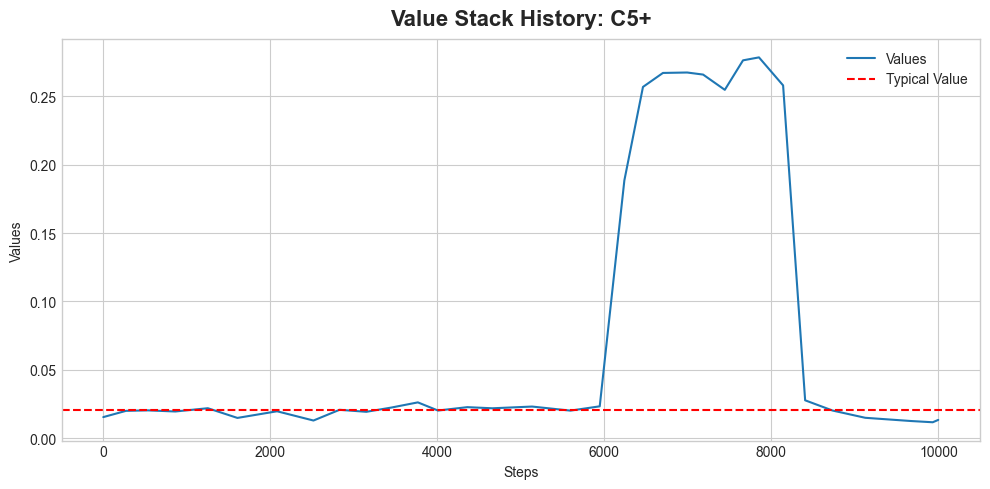

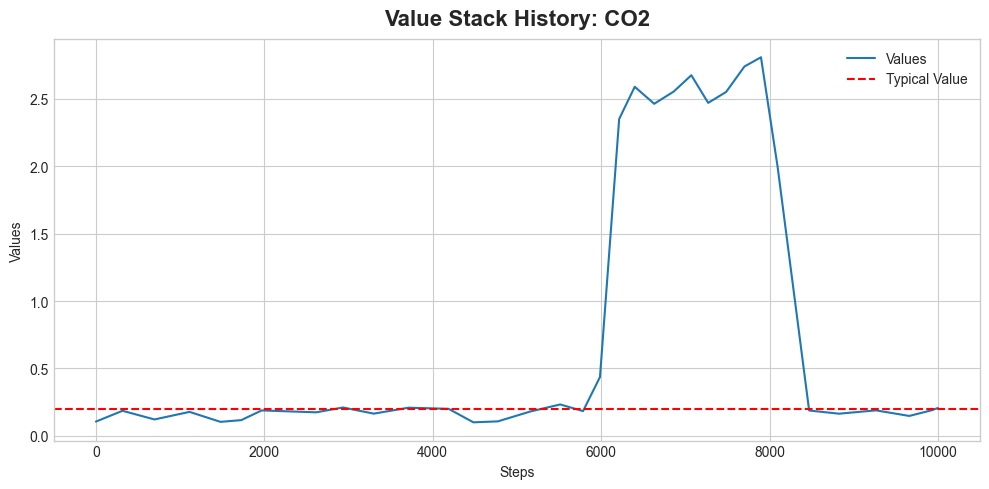

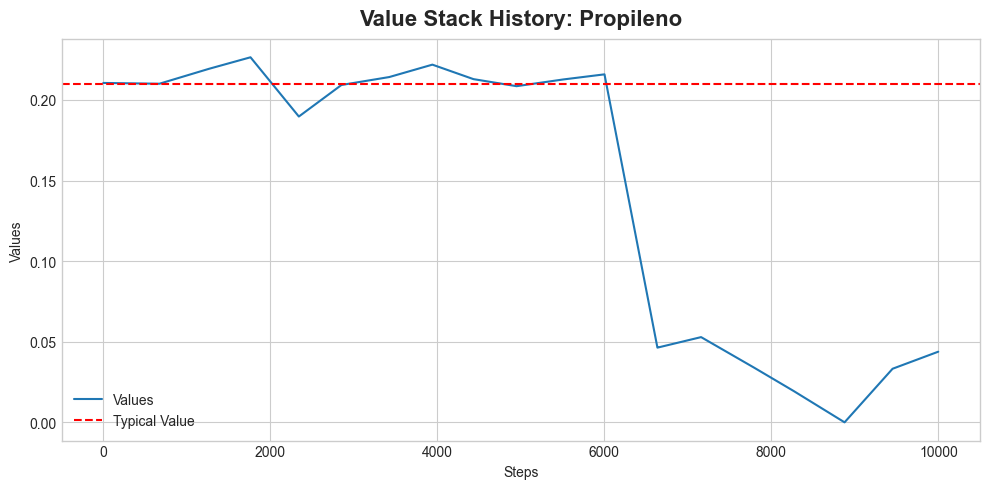

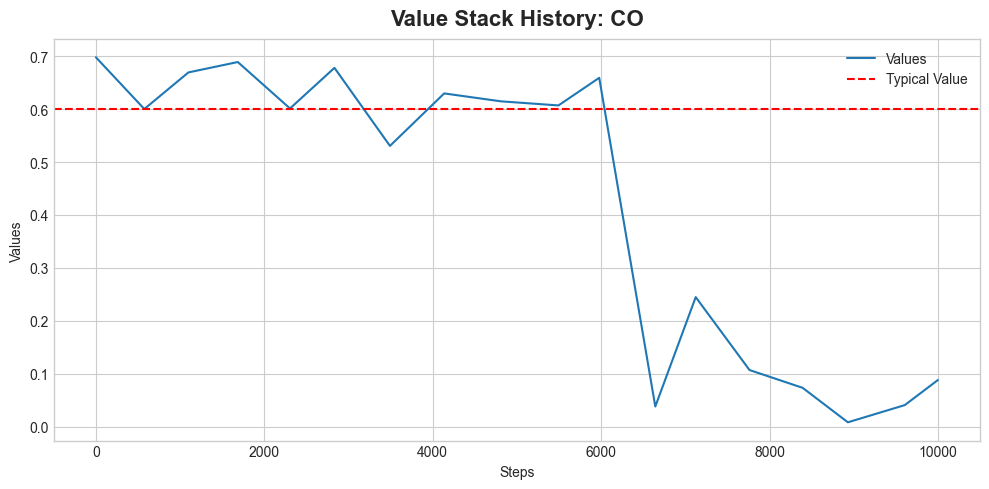

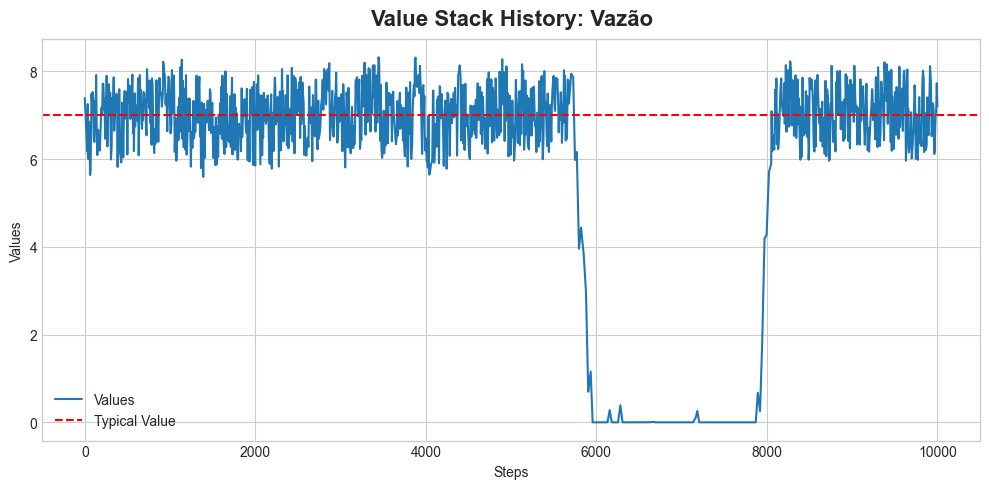

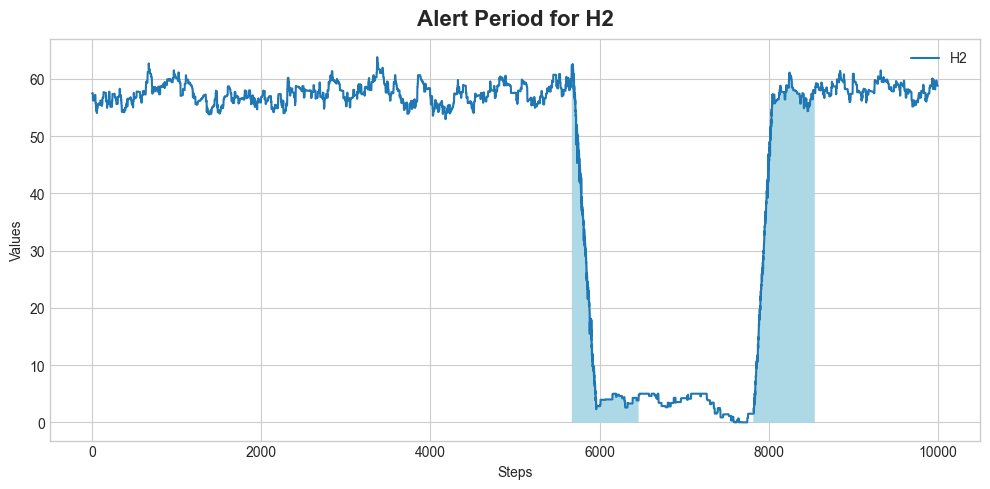

In [7]:
from Operators import HighVariability, LowVariability
from Relations import LinkH2Metano, LinkSimilarBehavior, LinkLongReturn
from TurbineSimulator import Graph, plot_nodes_history, plot_sum_history


prob = 0.0001
# prob = 0.000005
H2      = HighVariability(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=57.5, 
                   name="H2", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1,
                   exceed_prob=prob, 
                   exceed_duration_range=(180,300),
                   return_duration_range=(180,300), 
                   exceed_bias_range=(-5,5),
                   exceed_bias_prob=0.05,
                   exceed_peak_value_range=(0,5),
                   hold_duration_range=(1500,2000),
                   hold_prob_vary=0.05,
                   hold_variation=1)
Metano  = HighVariability(lower_bound=30, 
                   upper_bound=70, 
                   typical_value=40, 
                   name="Metano", 
                   typical_bias=0.1,
                   typical_bias_prob=0.1,
                   theta=1.5, 
                   theta_prob=0.1)
relation1 = LinkH2Metano(limit_lower_bound=75, 
                               limit_upper_bound=100,
                               typical_lower_bound=93,
                               typical_upper_bound=98)

Enxofre = LowVariability(lower_bound=0, 
                         upper_bound=8, 
                         typical_value=0.002,
                         name="Enxofre", 
                         theta=0.002, 
                         steps_range=(480,700))
relation2 = LinkSimilarBehavior(correlation=0.3,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.6,
                                  theta_prob=0.5)

Etileno = LowVariability(lower_bound=0.05,
                          upper_bound=0.55,
                          typical_value=0.2,
                          name="Etileno",
                          theta=0.05,
                          steps_range=(480,700))
relation3 = LinkSimilarBehavior(correlation=0.6,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.01,
                                  theta_prob=0.5,
                                  amplifier=1.8)

NButano = LowVariability(lower_bound=0.01,
                          upper_bound=0.45,
                          typical_value=0.15,
                          name="N-Butano",
                          theta=0.03,
                          steps_range=(480,700))
relation4 = LinkSimilarBehavior(correlation=0.7,
                                  typical_bias_prob=0.4,
                                  typical_bias=0.4,
                                  theta_prob=0.5)

Etano = LowVariability(lower_bound=0.06,
                        upper_bound=1.8,
                        typical_value=0.43,
                        name="Etano",
                        theta=0.7,
                        steps_range=(240,480))
relation5 = LinkSimilarBehavior(correlation=0.85,
                                   typical_bias_prob=0.1,
                                   typical_bias=0.4,
                                   theta_prob=0.7,
                                   amplifier=14,
                                   holding_range=(50,60))

Propano = LowVariability(lower_bound=0,
                          upper_bound=0.69,
                          typical_value=0.2,
                          name="Propano",
                          theta=0.1,
                          steps_range=(240,480))
relation6 = LinkSimilarBehavior(correlation=0.94,
                                   typical_bias_prob=0.01,
                                   typical_bias=0.8,
                                   theta_prob=0.7,
                                   amplifier=14,
                                   holding_range=(50,60))

C5 = LowVariability(lower_bound=0,
                     upper_bound=0.3,
                     typical_value=0.021,
                     name="C5+",
                     theta=0.01,
                     steps_range=(240,480))
relation7 = LinkSimilarBehavior(correlation=0.89,
                                   typical_bias=0.01,
                                   typical_bias_prob=0.1,
                                   theta_prob=0.7,
                                   amplifier=10,
                                   holding_range=(180,300))

CO2 = LowVariability(lower_bound=0,
                      upper_bound=0.3,
                      typical_value=0.2,
                      name="CO2",
                      theta=0.1,
                      steps_range=(240,480))
relation8 = LinkSimilarBehavior(correlation=0.92,
                                   typical_bias=0.1,
                                   typical_bias_prob=0.1,
                                   theta_prob=0.7,
                                   amplifier=10,
                                   holding_range=(180,230))

Propileno = LowVariability(lower_bound=0.06,
                            upper_bound=0.3,
                            typical_value=0.21,
                            name="Propileno",
                            theta=0.02,
                            steps_range=(480,700))
relation9 = LinkLongReturn(correlation=0.5,
                                  typical_bias_prob=0.1,
                                  typical_bias=0.1,
                                  theta_prob=0.5,
                                  amplifier=1.8,
                                  holding_range=(480,700),
                                  back_range=(6000,7200),
                                  back_typical_prob=0.7,
                                  back_typical_range=(-0.02,0.02))

CO = LowVariability(lower_bound=0,
                     upper_bound=0.8,
                     typical_value=0.6,
                     name="CO",
                     theta=0.1,
                     steps_range=(480,700))
relation10 = LinkLongReturn(correlation=0.5,
                                   typical_bias_prob=0.1,
                                   typical_bias=0.1,
                                   theta_prob=0.5,
                                   amplifier=1.8,
                                   holding_range=(480,700),
                                   back_range=(6000,7200),
                                   back_typical_prob=0.7,
                                   back_typical_range=(-0.02,0.02))

vazao = LowVariability(lower_bound=3,
                       upper_bound=10,
                       typical_value=7,
                       name="Vazão",
                       theta=1,
                       steps_range=(5,10))
relation11 = LinkSimilarBehavior(correlation=0.92,
                                   typical_bias=0.1,
                                   typical_bias_prob=0.5,
                                   theta_prob=1,
                                   amplifier=1.4,
                                   holding_range=(20,30))

graph = Graph(random_seed=44, debug=False, n_unstable_steps=480)
node1 = graph.add_node(H2)
node2 = graph.add_node(Metano)
graph.add_edge(root=node1, child=node2, strategy=relation1)
node3 = graph.add_node(Enxofre)
graph.add_edge(root=node1, child=node3, strategy=relation2)
node4 = graph.add_node(Etileno)
graph.add_edge(root=node1, child=node4, strategy=relation3)
node5 = graph.add_node(NButano)
graph.add_edge(root=node1, child=node5, strategy=relation4)
node6 = graph.add_node(Etano)
graph.add_edge(root=node2, child=node6, strategy=relation5)
node7 = graph.add_node(Propano)
graph.add_edge(root=node2, child=node7, strategy=relation6)
node8 = graph.add_node(C5)
graph.add_edge(root=node2, child=node8, strategy=relation7)
node9 = graph.add_node(CO2)
graph.add_edge(root=node2, child=node9, strategy=relation8)
node10 = graph.add_node(Propileno)
graph.add_edge(root=node1, child=node10, strategy=relation9)
node11 = graph.add_node(CO)
graph.add_edge(root=node1, child=node11, strategy=relation10)
node12 = graph.add_node(vazao)
graph.add_edge(root=node1, child=node12, strategy=relation11)

# graph.display()
# graph.simulate(10000)

# make a dict with the nodes as key and empty list as value
confirm = {node1: [],
         node2: [],
         node3: [],
         node4: [],
         node5: [],
         node6: [],
         node7: [],
         node8: [],
         node9: [],
         node10: [],
         node11: [],
         node12: []}

alert = []
for _ in range(10000):
    graph.simulate(1)
    alert.append(graph.last_alert)
    for node in confirm.keys():
        confirm[node].append(node.last_value)

for node in confirm.keys():
    plot_history(node=node, stack=confirm[node])


plot_alert_period(stack=alert, stack2=confirm[node1], node=node1)

# plot_nodes_history(nodes=[node1], range=(5500,6000))
# plot_nodes_history(nodes=[node2])
# plot_nodes_history(nodes=[node1,node2])
# plot_nodes_history(nodes=[node10])
# plot_nodes_history(nodes=[node11])
# plot_sum_history(node1, node2)